In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bda-2019-ml-test/Test_Mask_Dataset.csv
/kaggle/input/bda-2019-ml-test/Sample Submission.csv
/kaggle/input/bda-2019-ml-test/Train_Mask.csv


### LOADING THE DATA

In [2]:
#Reading the train, test and sample csv files 
train = pd.read_csv('/kaggle/input/bda-2019-ml-test/Train_Mask.csv')
test = pd.read_csv('/kaggle/input/bda-2019-ml-test/Test_Mask_Dataset.csv')
sample = pd.read_csv('/kaggle/input/bda-2019-ml-test/Sample Submission.csv')

In [3]:
#Displaying the first 5 records of the train dataset
train.head()

,timeindex,flag,currentBack,motorTempBack,positionBack,refPositionBack,refVelocityBack,trackingDeviationBack,velocityBack,currentFront,motorTempFront,positionFront,refPositionFront,refVelocityFront,trackingDeviationFront,velocityFront
0,1,1,30.0,46,576.499377,581.499997,7.000000,7.000623,10.000000,16.0,46,970.499907,971.499997,10.000000,8.000125,5.000000
1,2,1,101.0,42,576.499211,576.499999,9.000000,8.000747,7.000000,66.0,42,969.499450,969.499999,5.000000,10.000540,10.000000
2,3,1,815.0,41,355.576792,363.368778,584.045836,4.994664,587.020659,726.0,38,741.523412,742.361361,590.807348,4.987812,593.415386
3,4,1,219.0,40,577.499585,578.499998,7.000000,6.000332,8.041526,207.0,39,972.499575,971.499998,5.000000,7.000457,6.031144
4,5,1,76.0,40,4.998796,9.000000,6.000000,7.001246,6.000000,-13.0,43,398.999076,398.000000,6.000000,5.000914,8.000000


In [4]:
#Displaying the descriptive statistics of the training set
train.describe()

,timeindex,flag,currentBack,motorTempBack,positionBack,refPositionBack,refVelocityBack,trackingDeviationBack,velocityBack,currentFront,motorTempFront,positionFront,refPositionFront,refVelocityFront,trackingDeviationFront,velocityFront
count,11227.00000,11227.000000,11227.000000,11227.000000,11227.000000,11227.000000,11227.000000,11227.000000,11227.000000,11227.000000,11227.000000,11227.000000,11227.000000,11227.000000,11227.000000,11227.000000
mean,5614.00000,0.396455,86.208159,41.389686,454.818115,455.457622,74.391243,7.509257,74.349871,175.678543,42.569698,845.152363,845.770184,74.485635,7.492794,74.490320
std,3241.10007,0.489183,184.142004,3.494035,217.860048,217.627546,177.001734,1.713630,177.036037,228.341186,3.608419,218.227800,217.983051,177.537284,1.709240,177.480053
min,1.00000,0.000000,-81.500000,30.000000,4.998650,5.000000,5.000000,4.979985,4.958474,-87.000000,30.000000,396.998371,397.000000,5.000000,4.974877,4.958474
25%,2807.50000,0.000000,-17.000000,39.000000,384.935546,389.770291,6.000000,6.000000,6.000000,36.000000,41.000000,767.922539,772.726670,6.000000,6.000415,6.000000
50%,5614.00000,0.000000,12.000000,42.000000,577.499959,577.499998,8.000000,7.001204,8.000000,98.000000,43.000000,969.499658,969.499998,8.000000,7.978946,8.000000
75%,8420.50000,1.000000,90.000000,44.000000,579.500000,579.499999,10.000000,9.000000,10.000000,191.000000,45.000000,971.499948,971.499999,10.000000,9.000394,10.000000
max,11227.00000,1.000000,2408.500000,47.000000,581.502616,581.499999,1176.261126,10.001661,1123.643342,1113.000000,49.000000,973.517597,973.499999,642.625119,10.006727,653.070908


In [5]:
#Separating the train data into its features (X) and labels (y)
X = train.drop('flag', axis=1)
y = train['flag']

### CHECKING FOR MISSING VALUES

In [6]:
#Displaying the number of missing values in each column of X.
X.isnull().sum()

timeindex                 0
currentBack               0
motorTempBack             0
positionBack              0
refPositionBack           0
refVelocityBack           0
trackingDeviationBack     0
velocityBack              0
currentFront              0
motorTempFront            0
positionFront             0
refPositionFront          0
refVelocityFront          0
trackingDeviationFront    0
velocityFront             0
dtype: int64

In [7]:
#Displaying the number of missing values in each column of the test data.
test.isnull().sum()

timeindex                 0
currentBack               0
motorTempBack             0
positionBack              0
refPositionBack           0
refVelocityBack           0
trackingDeviationBack     0
velocityBack              0
currentFront              0
motorTempFront            0
positionFront             0
refPositionFront          0
refVelocityFront          0
trackingDeviationFront    0
velocityFront             0
dtype: int64

No missing values were found in the feature set X or in the test set.

In [8]:
#Displaying the information of the feature set X, such as column data types, non-null values and memory usage.
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11227 entries, 0 to 11226
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   timeindex               11227 non-null  int64  
 1   currentBack             11227 non-null  float64
 2   motorTempBack           11227 non-null  int64  
 3   positionBack            11227 non-null  float64
 4   refPositionBack         11227 non-null  float64
 5   refVelocityBack         11227 non-null  float64
 6   trackingDeviationBack   11227 non-null  float64
 7   velocityBack            11227 non-null  float64
 8   currentFront            11227 non-null  float64
 9   motorTempFront          11227 non-null  int64  
 10  positionFront           11227 non-null  float64
 11  refPositionFront        11227 non-null  float64
 12  refVelocityFront        11227 non-null  float64
 13  trackingDeviationFront  11227 non-null  float64
 14  velocityFront           11227 non-null

All the features are numerical.

### VISUALIZING THE DISTRIBUTION OF EACH VARIABLE

In [9]:
#Importing the seaborn library for data visualization
import seaborn as sns

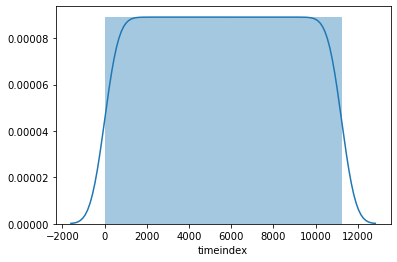

In [10]:
#Distribution plot of timeindex
sns.distplot(X['timeindex'])

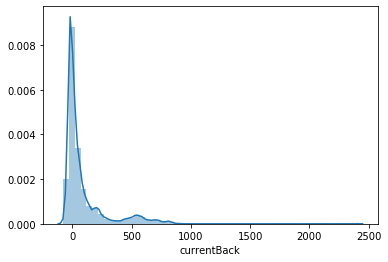

In [11]:
#Distribution plot of currentBack
sns.distplot(X['currentBack'])

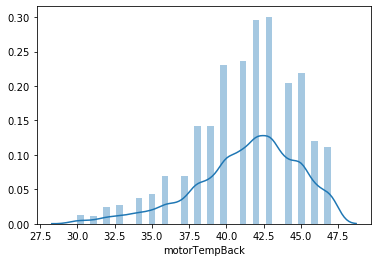

In [12]:
#Distribution plot of motorTempBack
sns.distplot(X['motorTempBack'])

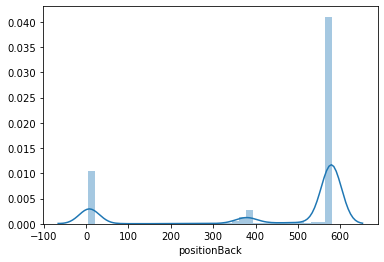

In [13]:
#Distribution plot of positionBack
sns.distplot(X['positionBack'])

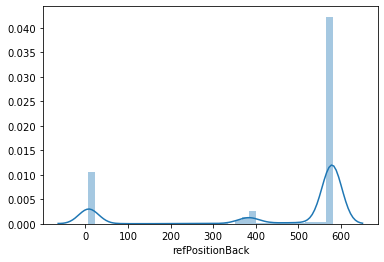

In [14]:
#Distribution plot of refPositionBack
sns.distplot(X['refPositionBack'])

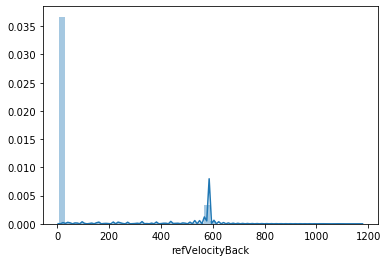

In [15]:
#Distribution plot of refVelocityBack
sns.distplot(X['refVelocityBack'])

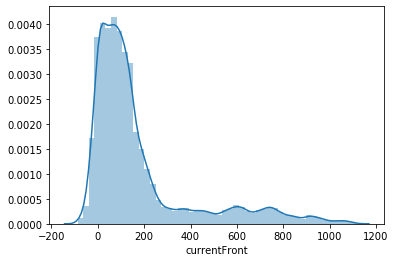

In [16]:
#Distribution plot of currentFront
sns.distplot(X['currentFront'])

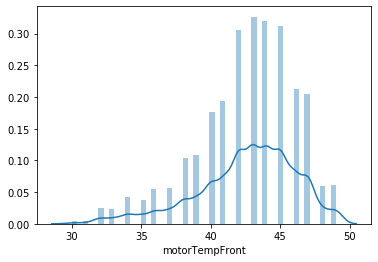

In [17]:
#Distribution plot of motorTempFront
sns.distplot(X['motorTempFront'])

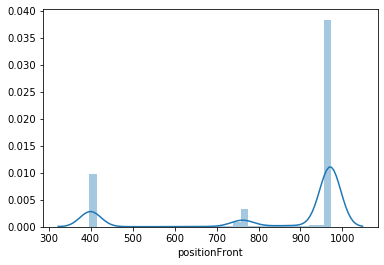

In [18]:
#Distribution plot of positionFront
sns.distplot(X['positionFront'])

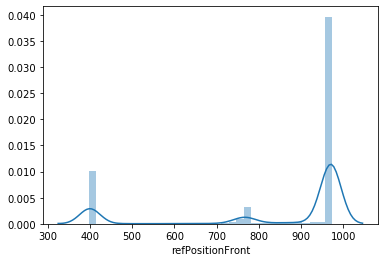

In [19]:
#Distribution plot of refPositionFront
sns.distplot(X['refPositionFront'])

### ANALYZING THE CORRELATION MATRIX FOR THE TRAINING SET

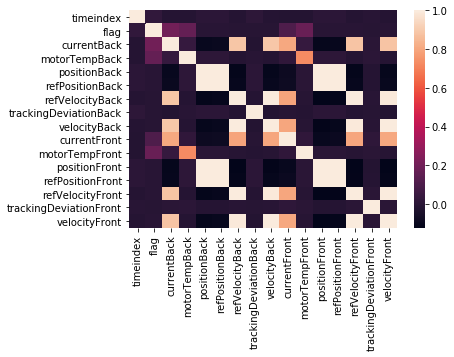

In [20]:
cor_matrix = train.corr()    #To obtain the correlation matrix
sns.heatmap(cor_matrix)      #To obtain the heatmap of the correlaation matrix

### CORRELATION BETWEEN THE FEATURES AND THE TARGET VARIABLE

In [21]:
#Correlation between each feature and the target variable
corr = X.corrwith(y)
cor_df = pd.DataFrame({'Col_names': corr.index, 'Correlation': abs(corr.values)}).sort_values(by = 'Correlation', ascending = False)
cor_df

,Col_names,Correlation
1,currentBack,0.202685
9,motorTempFront,0.177750
2,motorTempBack,0.168416
8,currentFront,0.108213
0,timeindex,0.022282
13,trackingDeviationFront,0.004668
5,refVelocityBack,0.004356
7,velocityBack,0.004248
6,trackingDeviationBack,0.004209
14,velocityFront,0.004033


### APPLYING LOG TRANSFORMATIONS TO SKEWED DATA

In [22]:
#Finding the positive-valued columns to apply log transormations
pos_col = X[X>0]
pos = pos_col.loc[:,pos_col.columns[pos_col.isnull().sum()==0]]

In [23]:
#Finding the skewness of each feature
from scipy.stats import skew 
skewness = pos.apply(lambda x: skew(x))
skewness.sort_values(ascending=False)

refVelocityBack           2.404473
velocityBack              2.404358
refVelocityFront          2.403512
velocityFront             2.403479
trackingDeviationBack     0.009110
trackingDeviationFront    0.003304
timeindex                 0.000000
motorTempBack            -0.719667
motorTempFront           -0.766119
positionFront            -1.402413
refPositionFront         -1.412663
positionBack             -1.425881
refPositionBack          -1.435783
dtype: float64

In [24]:
#Finding features with skewness greater than 0.5
skewed_feature = skewness[abs(skewness) > 0.5].index

#Applying log transformations to the skewed features
trans_feature = np.log1p(X.loc[:, skewed_feature])
X.loc[:, trans_feature.columns] = trans_feature

### STANDARDIZATION

In [25]:
from sklearn.preprocessing import StandardScaler
X_scaled = StandardScaler().fit_transform(X)           #Standardizing train features
X_scaled_test = StandardScaler().fit_transform(test)   #Standardizing test features

### SPLITTING INTO TRAIN AND TEST SETS

In [26]:
#Splitting into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state = 4, stratify = y)

### REMOVING CLASS IMBALANCE

In [27]:
#Importing the matplotlib library to plot graphs
import matplotlib.pyplot as plt

<BarContainer object of 2 artists>

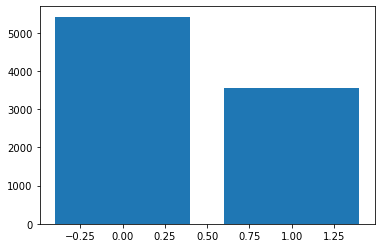

In [28]:
#Bar plot showing class imbalance
plt.bar(y_train.value_counts().index, y_train.value_counts().values)

In [29]:
#Correcting class imbalance by over-sampling using SMOTE
import tensorflow
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_smot, y_smot = SMOTE().fit_sample(X_train, y_train)

Using TensorFlow backend.


<BarContainer object of 2 artists>

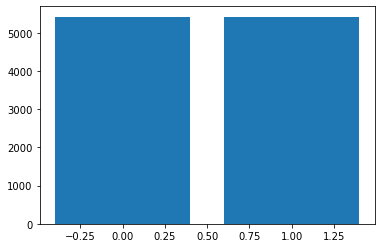

In [30]:
#Bar plot showing correction of class imbalance
plt.bar(y_smot.value_counts().index, y_smot.value_counts().values)

### FITTING A LOGISTIC REGRESSION MODEL

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

#Fitting Logistic Regression model
log = LogisticRegression().fit(X_smot, y_smot)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [32]:
#Predicting class labels using the trained logit regression model
y_hat1 = log.predict(X_test)

In [33]:
#Finding the F1-score of the logit regression model
f1 = f1_score(y_test, y_hat1)
f1

0.6291502532357907

### FITTING A RANDOM FOREST MODEL

In [34]:
from sklearn.ensemble import RandomForestClassifier

#Fitting Random Forest Classifier
rf = RandomForestClassifier().fit(X_smot ,y_smot)

In [35]:
#Predicting class labels using the trained Random Forest model
y_hat2 = rf.predict(X_test)

In [36]:
#Finding the F1-score of the Random Forest model
f2 = f1_score(y_test, y_hat2)
f2

0.8563049853372434

In [37]:
#Finding Feature Importance
FI = rf.feature_importances_
df = pd.DataFrame({'Col_names': X.columns.tolist(), 'FI': FI})
df

,Col_names,FI
0,timeindex,0.034439
1,currentBack,0.304764
2,motorTempBack,0.051766
3,positionBack,0.041144
4,refPositionBack,0.025209
5,refVelocityBack,0.034128
6,trackingDeviationBack,0.091829
7,velocityBack,0.039443
8,currentFront,0.122555
9,motorTempFront,0.061996


<BarContainer object of 15 artists>

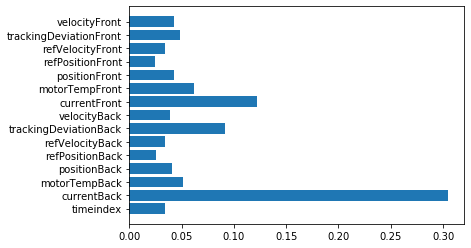

In [38]:
#Bar plot showing the importance of each feature
plt.barh(df.Col_names, df.FI)

### FITTING AN SVM MODEL

In [39]:
from sklearn.svm import SVC

#Fitting Support Vector Machine
svc = SVC().fit(X_smot, y_smot)

In [40]:
#Predicting class labels using the trained SVM model
y_hat3 = svc.predict(X_test)

In [41]:
#Finding the F1-score of the SVM model
f3 = f1_score(y_test, y_hat3)
f3

0.7043865225683408

### FITTING A KNN MODEL

In [42]:
from sklearn.neighbors import KNeighborsClassifier

#Fitting K-Nearest Neighbor Classifier
knn = KNeighborsClassifier().fit(X_smot, y_smot)

In [43]:
#Predicting class labels using the trained KNN model
y_hat4 = knn.predict(X_test)

In [44]:
#Finding the F1-score of the KNN model
f4 = f1_score(y_test, y_hat4)
f4

0.5927170868347339

RANDOM FOREST SHOWED THE HIGHEST F1 SCORE

In [45]:
#Finding the class labels for the test dataset using Random Forest model
pred = rf.predict(X_scaled_test)
pred

array([1, 0, 1, ..., 1, 1, 1])